## Decision Trees

### Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [97]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Part 0

- Read each cell of the examples below, run and check the outputs. 

### Confusion matrix plot

In [98]:
# Show confusion matrix
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    
    plt.title('Confusion matrix')
    plt.colorbar()
    
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Confusion matrix simple example 1

[[2 1 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0 2]]


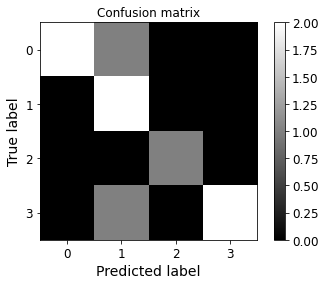

In [99]:
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
confusion_mat = confusion_matrix(y_true, y_pred)

print(confusion_mat)
plot_confusion_matrix(confusion_mat, 4)

In [100]:
# Print classification report
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3']

result_metrics = classification_report(y_true, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.50      1.00      0.67         2
     Class-2       1.00      1.00      1.00         1
     Class-3       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9



### Confusion matrix simple example 2

[[2 2]
 [0 5]]


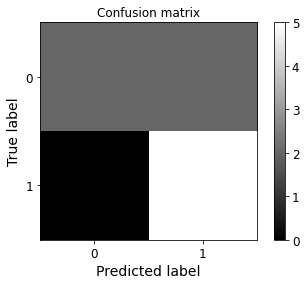

In [101]:
y_true2 = [1, 0, 0, 1, 1, 0, 1, 1, 0]
y_pred2 = [1, 1, 0, 1, 1, 0, 1, 1, 1]
confusion_mat2 = confusion_matrix(y_true2, y_pred2)

print(confusion_mat2)
plot_confusion_matrix(confusion_mat2, 2)

In [102]:
# Print classification report
target_names2 = ['Class-0', 'Class-1']

result_metrics = classification_report(y_true2, y_pred2, target_names=target_names2)

print(result_metrics)

              precision    recall  f1-score   support

     Class-0       1.00      0.50      0.67         4
     Class-1       0.71      1.00      0.83         5

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9



## Data Visualization

### iris dataset before we start training and testing a model

   SepalLength  SepalWidth  PetalLength  PetalWidth         Name  Class
0          5.1         3.5          1.4         0.2  Iris-setosa      0
1          4.9         3.0          1.4         0.2  Iris-setosa      0
2          4.7         3.2          1.3         0.2  Iris-setosa      0
3          4.6         3.1          1.5         0.2  Iris-setosa      0
4          5.0         3.6          1.4         0.2  Iris-setosa      0
     SepalLength  SepalWidth  PetalLength  PetalWidth            Name  Class
145          6.7         3.0          5.2         2.3  Iris-virginica      2
146          6.3         2.5          5.0         1.9  Iris-virginica      2
147          6.5         3.0          5.2         2.0  Iris-virginica      2
148          6.2         3.4          5.4         2.3  Iris-virginica      2
149          5.9         3.0          5.1         1.8  Iris-virginica      2


<Figure size 432x288 with 0 Axes>

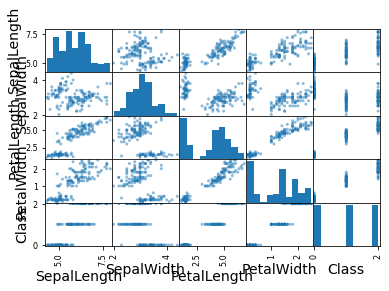

<Figure size 432x288 with 0 Axes>

In [103]:
import matplotlib.pyplot as plt
import pandas as pd

# read data from CSV file to dataframe
iris = pd.read_csv('./data/iris.csv')
print(iris.head())
print(iris.tail())

# scatter matrix plot
pd.plotting.scatter_matrix(iris);

plt.figure()

# Decision Trees

- Read the details of decision tree classifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- Check out the difference between model parameters and hyper parameters:

https://towardsdatascience.com/model-parameters-and-hyperparameters-in-machine-learning-what-is-the-difference-702d30970f6

In [104]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

#print(iris)

### Load data

- For the following code, we use sklearn.datasets package for loading a dataset instead of reading a data file stored on a local machine. 

### Split the data to training and testing 

In [105]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training
### Learing using training data

- use Gini index measure 

*** Notes: you can also use gain information (entropy) measure by setting criterion="entropy" in the model

In [106]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Testing
### Evaluating the model using testing data

In [107]:
y_pred = tree_clf.predict(X_test)

# Visualization

## Confusion matrix

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


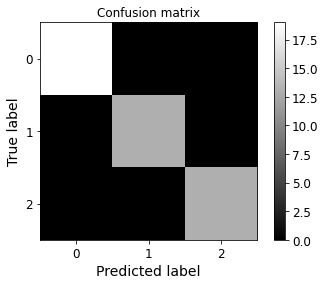

In [108]:
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

### Model performance summary

In [109]:
# Print classification report
target_names = iris.target_names

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [110]:
# you can access each class's metrics from result_metrics
result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print(result_metrics_dict['setosa']['precision'])

1.0


### Draw a decision tree

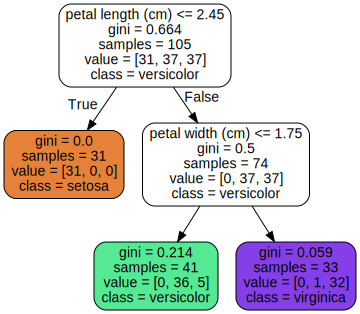

In [111]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## k-Cross Validation

- using KFold function with freedom

In [112]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 


KFold(n_splits=3, random_state=None, shuffle=True)


### Applying k-Cross Validation

In [113]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       1.00      0.92      0.96        12
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.87      1.00      0.93        20
   virginica       1.00      0.79      0.88        14

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.89      0.94      0.92        18
   virginica       0.94      0.89      0.92        19

    accuracy        

# Predicting classes and class probabilities

In [114]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.91428571, 0.08571429]])

In [115]:
tree_clf.predict([[5, 1.5]])

array([1])

# Decision Tree boundary Visualization

In [116]:
## Example1

Saving figure decision_tree_decision_boundaries_plot


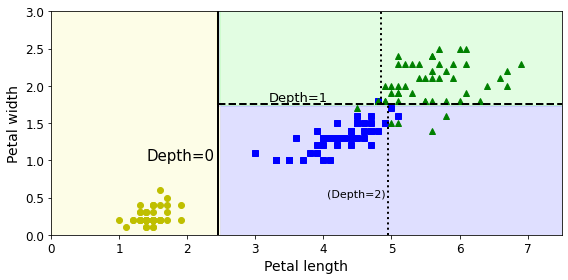

In [117]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# Sensitivity to training set details

In [118]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower

array([[4.8, 1.8]])

In [119]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

Saving figure decision_tree_instability_plot


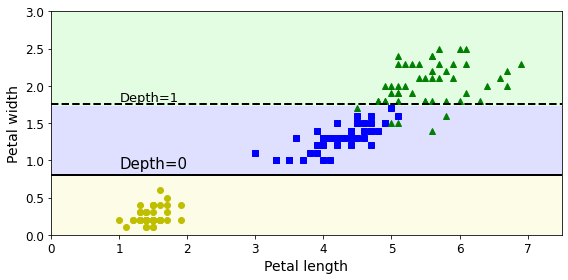

In [120]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

Saving figure min_samples_leaf_plot


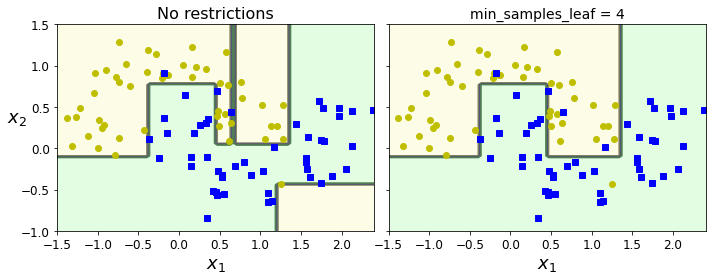

In [121]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

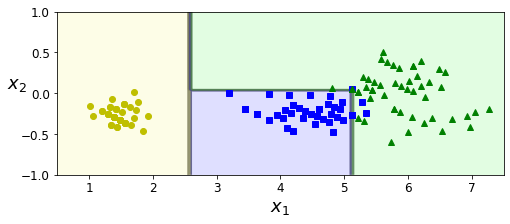

In [122]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

Saving figure sensitivity_to_rotation_plot


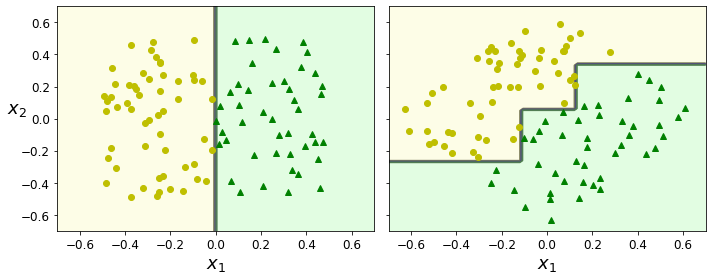

In [123]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

# TW4

## Part 1

## Construct decision trees

#### 1. Construct  a decision tree using the following parameters

- Use information gain (entropy) measure
- Apply k=10 cross validation and print a summary of statistics (performance evaluation) for each fold 

In [124]:
tree_clf_entropy = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
tree_clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [125]:
## Testing
### Evaluating the model using testing data
y_pred = tree_clf_entropy.predict(X_test)

In [126]:
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
#print(confusion_mat)
#plot_confusion_matrix(confusion_mat, 3)

In [127]:
### Model performance summary
# Print classification report
target_names = iris.target_names
result_metrics = classification_report(y_test, y_pred, target_names=target_names)
#print(result_metrics)

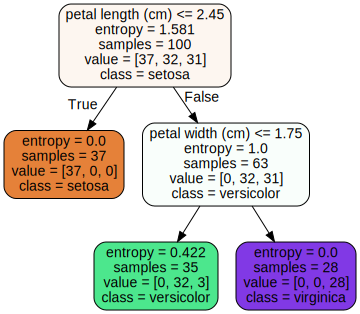

In [128]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf_entropy,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [129]:
## k-Cross Validation
#- using KFold function with freedom

from sklearn.model_selection import KFold # import k-fold validation
kf = KFold(n_splits=5, random_state=None, shuffle=True) # Define the split - into 10 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=5, random_state=None, shuffle=True)


In [130]:
#Applying k-Cross Validation
tree_clf_entropy = DecisionTreeClassifier(max_depth=2, random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_entropy.fit(X_train, y_train)
    
    y_pred = tree_clf_entropy.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.78      0.88         9
   virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.86      0.86      0.86         7
   virginica       0.92      0.92      0.92        13

    accuracy        

#### 2. Compare the performance results with those of the decision tree using Gini index measure in the above example

In [131]:
tree_clf_gini = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
tree_clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [132]:
## Testing
### Evaluating the model using testing data
y_pred = tree_clf_gini.predict(X_test)

In [133]:
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
#print(confusion_mat)
#plot_confusion_matrix(confusion_mat, 3)

In [134]:
### Model performance summary
# Print classification report
target_names = iris.target_names
result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print(result_metrics)

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12}, 'versicolor': {'precision': 0.8333333333333334, 'recall': 0.9090909090909091, 'f1-score': 0.8695652173913043, 'support': 11}, 'virginica': {'precision': 0.8333333333333334, 'recall': 0.7142857142857143, 'f1-score': 0.7692307692307692, 'support': 7}, 'accuracy': 0.9, 'macro avg': {'precision': 0.888888888888889, 'recall': 0.8744588744588745, 'f1-score': 0.8795986622073578, 'support': 30}, 'weighted avg': {'precision': 0.9, 'recall': 0.9, 'f1-score': 0.8983277591973243, 'support': 30}}


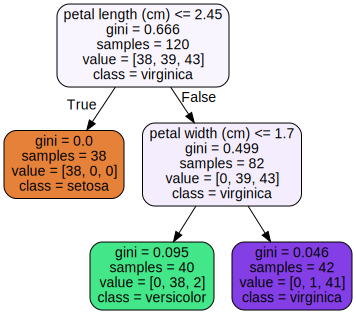

In [135]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf_gini,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [136]:
## k-Cross Validation
#- using KFold function with freedom

from sklearn.model_selection import KFold # import k-fold validation
kf = KFold(n_splits=5, random_state=None, shuffle=True) # Define the split - into 10 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=5, random_state=None, shuffle=True)


In [137]:
#Applying k-Cross Validation
tree_clf_gini = DecisionTreeClassifier(max_depth=2, random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_gini.fit(X_train, y_train)
    
    y_pred = tree_clf_gini.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names, output_dict=True))

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8}, 'versicolor': {'precision': 0.9230769230769231, 'recall': 0.9230769230769231, 'f1-score': 0.9230769230769231, 'support': 13}, 'virginica': {'precision': 0.8888888888888888, 'recall': 0.8888888888888888, 'f1-score': 0.8888888888888888, 'support': 9}, 'accuracy': 0.9333333333333333, 'macro avg': {'precision': 0.9373219373219372, 'recall': 0.9373219373219372, 'f1-score': 0.9373219373219372, 'support': 30}, 'weighted avg': {'precision': 0.9333333333333333, 'recall': 0.9333333333333333, 'f1-score': 0.9333333333333333, 'support': 30}}
{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9}, 'versicolor': {'precision': 1.0, 'recall': 0.9, 'f1-score': 0.9473684210526316, 'support': 10}, 'virginica': {'precision': 0.9166666666666666, 'recall': 1.0, 'f1-score': 0.9565217391304348, 'support': 11}, 'accuracy': 0.9666666666666667, 'macro avg': {'precision': 0.9722222222222222, 'recall': 0.96666666666666

#### 3. For both trees, change the following parameters and observe the changes:

- The depth of tree: currently max_depth=2 in the model training step. Change the depth 3, 4, 5 and check if this affects the overall results. 

- The k value for cross validation is currently set to 3. Change k value, k = 5, 7, 10 and check if this affects the overall results.

## 3 a. 
From manipulating the hyperparameter max_depth we found that the higher the max_depth the bigger the tree becomes with more internal node and branches. The optimal max_depth is 5 because at this level all the data is sorted perfectly into each class label (leaf node) leaving an entropy of 0. There is no significant difference between the Gini Model and the Entropy model. 

## 3b.
The k value for cross validation is currently set to 3. Change k value, k = 5, 7, 10 and check if this affects the overall results.


In [138]:
from sklearn.model_selection import KFold # import k-fold validation

class_reports = []
for i in (5,7,10):
    kf = KFold(n_splits=i, random_state=None, shuffle=True) # Define the split - into 10 folds 
    kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
    print(kf) 
    
    #Applying k-Cross Validation
    tree_clf_gini = DecisionTreeClassifier(max_depth=i, random_state=42)

    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        tree_clf_gini.fit(X_train, y_train)
    
        y_pred = tree_clf_gini.predict(X_test)
    
        # Print classification report
        target_names = iris.target_names
        class_reports = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
        print(class_reports)



KFold(n_splits=5, random_state=None, shuffle=True)
{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10}, 'versicolor': {'precision': 0.9166666666666666, 'recall': 0.9166666666666666, 'f1-score': 0.9166666666666666, 'support': 12}, 'virginica': {'precision': 0.875, 'recall': 0.875, 'f1-score': 0.875, 'support': 8}, 'accuracy': 0.9333333333333333, 'macro avg': {'precision': 0.9305555555555555, 'recall': 0.9305555555555555, 'f1-score': 0.9305555555555555, 'support': 30}, 'weighted avg': {'precision': 0.9333333333333333, 'recall': 0.9333333333333333, 'f1-score': 0.9333333333333333, 'support': 30}}
{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7}, 'versicolor': {'precision': 0.9230769230769231, 'recall': 1.0, 'f1-score': 0.9600000000000001, 'support': 12}, 'virginica': {'precision': 1.0, 'recall': 0.9090909090909091, 'f1-score': 0.9523809523809523, 'support': 11}, 'accuracy': 0.9666666666666667, 'macro avg': {'precision': 0.9743589743589745

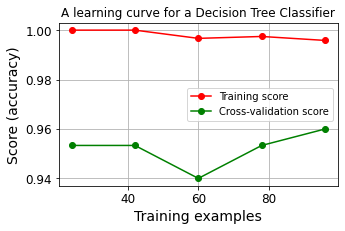

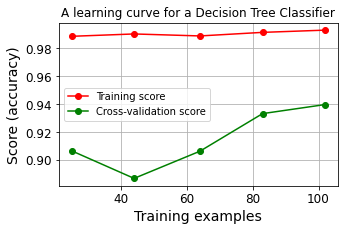

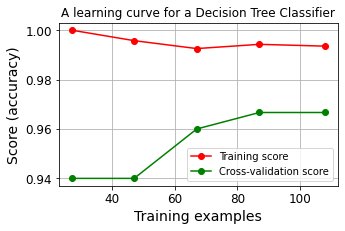

In [139]:
from sklearn.model_selection import learning_curve

for i in (5,7,10):
    train_sizes = np.linspace(0.2,0.8,5)

    train_sizes, train_scores, test_scores = learning_curve(tree_clf_gini, X, y, train_sizes = train_sizes, 
                                scoring= 'accuracy',cv=i, shuffle = True)
# print(train_scores)
# print(test_scores)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Plot learning curve
    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
    ax.set_title('A learning curve for a Decision Tree Classifier')
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score (accuracy)")
    ax.grid()

    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.legend(loc="best")

    plt.show()



When we change the k value the learning curve changes and the optimal number of training samples also changes. We base the optimal training sample base on the x value where the difference in the accuracy of the test set and the training set is at a global minima.


## Part 2

#### 1. Look through an example list at:
    
https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset

#### 2. Discuss about different ways to handle the following types of data for decision tree classification. 

- text data (strings): in the case a dataset includes non-numerical data. 

- continuous data like age, weight, income, etc.
 

*** Notes: This will be also a reference for our next problem-solving assignment.

## 2a.
- Represent the string as a hash and classify according to the hash code
- If we have name we can break down the string to first and last name seperately and categorize first by last name then secondly by first name. 

## 2b.
- We can break data into different classes for example age could be broken down to 30s, 40s, 50s, etc. In the case of weight if we have height we can calculate and categorize it into BMI.

### Submission(s): Each individual student should make own submission. 

#### - Write a short paragraph describing what you found from the process on Canvas.
#### - Upload the notebook on your Git repo and write an URL link. 

## Summary
Creating a classification model from the Decision Tree algorithm and measuring its accuracy is very difficult. Although much of the work is automated for us we still need to understand the parameters and hyperparameters needed. Given this caviat, I found that the Gini versus Entropy reduction in impurity method create the same Decision Trees. 
Although in this case I suspect it is because there are not many attributes to work with and because the attributes are similar in nature. After performing K-cross validation and plotting the learning curve in terms of accuracy we found that the best accuracy is generated with a training set of around 68 samples. 